#### <font color="#03997A"> Diplomado en Ciencia de datos UNAM </font>

##### <font color="#03997A"> Dr: Alejandro Pimentel </font>

##### <font color="#03997A"> Modulo 6 Aprendizaje de Maquina supervisado </font>

##### <font color="#03997A"> Práctica 8: Metricas de regresión (evaluando para diferentes tipos de modelos de regresión para la dataset de diabetes) Alumno: Ibarra Ramírez Sergio </font>

Para comparar los diferentes tipos de modelos de Regresión se trabajará con el Dataset de diabetes y y se intentará hacer una predicicón de la variable target (y), usando los diferentes modelos y evaluando las métricas (R2, R2_ajustado, MAE, MAPE, MSE y RMSE)

Importamos entonces la data de diabetes con la que trabajeremos en todos los modelos  

In [1]:
from sklearn import datasets

# Load the dataset
diabetes = datasets.load_diabetes(as_frame=True)
diabetes

{'data':           age       sex       bmi        bp        s1        s2        s3  \
 0    0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
 1   -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
 2    0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
 3   -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
 4    0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   
 ..        ...       ...       ...       ...       ...       ...       ...   
 437  0.041708  0.050680  0.019662  0.059744 -0.005697 -0.002566 -0.028674   
 438 -0.005515  0.050680 -0.015906 -0.067642  0.049341  0.079165 -0.028674   
 439  0.041708  0.050680 -0.015906  0.017293 -0.037344 -0.013840 -0.024993   
 440 -0.045472 -0.044642  0.039062  0.001215  0.016318  0.015283 -0.028674   
 441 -0.045472 -0.044642 -0.073030 -0.081413  0.083740  0.027809  0.173816   
 
            s4        s5        s6  
 0   -0.002592  0

Se separa la variable dependiente Y de las independientes y hace el split de train y test  

In [2]:

## Vartiable dependiente
y_diabetes = diabetes['target']


## Vartiables independientes
X_diabetes = diabetes['data']


## Separacion en train y test 
from sklearn.model_selection import train_test_split

X_diabetes_train, X_diabetes_test, y_diabetes_train, y_diabetes_test = train_test_split(X_diabetes,y_diabetes,test_size=0.2,random_state=2023)
X_diabetes_train

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
318,0.088931,-0.044642,0.006728,0.025315,0.030078,0.008707,0.063367,-0.039493,0.009434,0.032059
301,-0.001882,0.050680,-0.024529,0.052858,0.027326,0.030001,0.030232,-0.002592,-0.021395,0.036201
189,-0.001882,-0.044642,-0.066563,0.001215,-0.002945,0.003070,0.011824,-0.002592,-0.020292,-0.025930
288,0.070769,0.050680,-0.016984,0.021872,0.043837,0.056305,0.037595,-0.002592,-0.070209,-0.017646
...,...,...,...,...,...,...,...,...,...,...
220,0.023546,0.050680,-0.039618,-0.005670,-0.048351,-0.033255,0.011824,-0.039493,-0.101640,-0.067351
417,-0.052738,-0.044642,0.071397,-0.074527,-0.015328,-0.001314,0.004460,-0.021412,-0.046883,0.003064
183,0.045341,0.050680,-0.035307,0.063187,-0.004321,-0.001627,-0.010266,-0.002592,0.015568,0.056912
25,-0.067268,0.050680,-0.012673,-0.040099,-0.015328,0.004636,-0.058127,0.034309,0.019196,-0.034215


### Para modelo Regresión Lineal Simple  

Se define y entrena el modelo linear_model, además de calcular los valores predichos 

In [4]:
from sklearn import linear_model

modelo_lineal_simple = linear_model.LinearRegression()
modelo_lineal_simple.fit(X_diabetes_train,y_diabetes_train)

y_pred_modelo_lineal_simple = modelo_lineal_simple.predict(X_diabetes_test)
y_pred_modelo_lineal_simple

array([164.55373422, 230.85851626, 113.38907917, 204.74116814,
       105.52033577, 181.94343833,  82.00806999,  80.44200645,
       131.11334734, 229.23179863,  64.57813456,  87.41220532,
        62.10905263, 185.67733585, 167.61767614, 112.95971024,
       134.31271633,  86.09584758, 211.57673686, 180.55183129,
        98.68632823, 162.10216242, 135.62768379, 116.78745979,
       132.63301895, 145.35430667, 183.40345264, 126.94847342,
       186.85842312, 116.67929912, 112.94997783, 102.34041042,
       218.79109715, 159.57945047, 211.26980683, 256.18130253,
       200.77215919, 159.41401685, 164.80825925, 196.08702759,
        93.79690234, 119.72402729, 122.30602092, 262.25806711,
       274.20992694,  64.31380709, 131.68679794,  99.26899165,
       251.70106532, 110.30732844, 137.84979152, 169.1755417 ,
       146.80923048, 204.35630293, 219.58742135, 114.73124039,
       245.37669038,  61.81665768, 252.75979509, 165.91501184,
        99.03083736,  54.56254085,  60.32039683, 102.17

##### Evaluación del coeficiente de detemrinación (R^2 ) [para el caso del modelo_lineal_simple para dataset de diabetes]

In [9]:
from sklearn.metrics import r2_score
R2_score_modelo_lineal_simple = r2_score(y_diabetes_test,y_pred_modelo_lineal_simple)
R2_score_modelo_lineal_simple 

0.5011352464069885

##### Evaluación el coeficiente de detemrinación ajustado [para el caso del modelo_lineal_simple para dataset de diabetes]

In [10]:
R2_ajustada_modelo_lineal_simple = 1 -(1-R2_score_modelo_lineal_simple)*(len(y_diabetes_train)-1)/(len(y_diabetes_train)-len(diabetes['feature_names'])-1)
R2_ajustada_modelo_lineal_simple

0.48654855770543837

##### Evaluación de Errores MAE y MAPE [para el caso del modelo_lineal_simple para dataset de diabetes]

In [12]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

MAE [para el caso del modelo_lineal_simple para dataset de diabetes]

In [13]:
MAE_modelo_lineal_simple = mean_absolute_error(y_diabetes_test,y_pred_modelo_lineal_simple)
MAE_modelo_lineal_simple

48.15457237383576

MAPE [para el caso del modelo_lineal_simple para dataset de diabetes]

In [14]:
MAPE_modelo_lineal_simple = mean_absolute_percentage_error(y_diabetes_test,y_pred_modelo_lineal_simple)
MAPE_modelo_lineal_simple

0.49435618942943926

##### Evaluación de Errores MSE y RMSE  [para el caso del modelo_lineal_simple para dataset de diabetes]

In [15]:
from sklearn.metrics import mean_squared_error

MSE [para el caso del modelo_lineal_simple para dataset de diabetes]

In [16]:
MSE_modelo_lineal_simple = mean_squared_error(y_diabetes_test,y_pred_modelo_lineal_simple)
MSE_modelo_lineal_simple

3490.250912883901

RMSE [para el caso del modelo_lineal_simple para dataset de diabetes]

In [18]:
RMSE_modelo_lineal_simple = mean_squared_error(y_diabetes_test,y_pred_modelo_lineal_simple,squared=False)
RMSE_modelo_lineal_simple

59.07834554965043

#### En general el  modelo_lineal_simple para dataset de diabetes tiene un R2 ~50% y MAPE de ~50%

### Para modelo Regresión KNN  

In [19]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import RadiusNeighborsRegressor

Vamos a definir los objetos que contendran los modelos k y/o radio específico 

In [32]:
modeloKNN_regression_n5 = KNeighborsRegressor(n_neighbors=5)
modeloR_regression_R10 = RadiusNeighborsRegressor(radius=10)

Se entrenan los modelos modeloKNN_regression & modeloR_regression, además de calcular los valores predichos con cada uno de ellos
(con un n_neighbors=5 y radius=10, respecivamente)  [para el caso de dataset de diabetes]

In [34]:

# Se entrena y aplica el modelo KNN regression a la dataset de diabetes (para un n_neighbors=5)

modeloKNN_regression_n5 = modeloKNN_regression_n5.fit(X_diabetes_train,y_diabetes_train)
y_pred_modeloKNN_regression_n5 = modeloKNN_regression_n5.predict(X_diabetes_test)
y_pred_modeloKNN_regression_n5



# Se entrena y aplica el modelo KNN regression a la dataset de diabetes (para un radius=10)

modeloR_regression_R10 = modeloR_regression_R10.fit(X_diabetes_train,y_diabetes_train)
y_pred_modeloR_regression_R10 = modeloR_regression_R10.predict(X_diabetes_test)
y_pred_modeloR_regression_R10


array([152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94334278,
       152.94334278, 152.94334278, 152.94334278, 152.94

##### Evaluación del coeficiente de detemrinación (R^2 ) [para el caso del modeloKNN_regression y modeloR_regression  para dataset de diabetes]

- R2 score para el caso del modeloKNN_regression para dataset de diabetes

In [42]:
from sklearn.metrics import r2_score
R2_score_modeloKNN_regression_n5 = r2_score(y_diabetes_test,y_pred_modeloKNN_regression_n5)
R2_score_modeloKNN_regression_n5

0.41554752645070003

Evaluación de diferentes valores de R2 score para diferentes valores de n_neighbors en el caso del modeloKNN_regression para dataset de diabetes

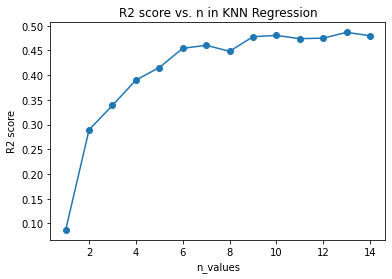

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values
n_neighbors_values = np.arange(1, 15)

# Initialize an empty list to store the R2 values
R2_score_values = []

# Loop through each k value
for n in n_neighbors_values:
    # Define the KNN regression model
    modeloK = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    modeloK.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test data
    y_pred_modeloKNN_regression = modeloK.predict(X_diabetes_test)
    
    # Calculate the R2_score
    R2_score_modeloKNN_regression = r2_score(y_diabetes_test,y_pred_modeloKNN_regression)
   
    
    # Append the RMSE value to the list
    R2_score_values.append(R2_score_modeloKNN_regression)

# Plot the RMSE values against the k values
plt.plot(n_neighbors_values, R2_score_values, marker='o')
plt.xlabel('n_values')
plt.ylabel('R2 score')
plt.title('R2 score vs. n in KNN Regression')
plt.show()

- R2 score para el caso del modeloR_regression para dataset de diabetes

In [40]:
from sklearn.metrics import r2_score
R2_score_modeloR_regression_R10 = r2_score(y_diabetes_test,y_pred_modeloR_regression_R10)
R2_score_modeloR_regression_R10

-0.0023121132781622755

Evaluación de diferentes valores de R2 score para diferentes valores de R_values en el caso del modeloR_regression para dataset de diabetes

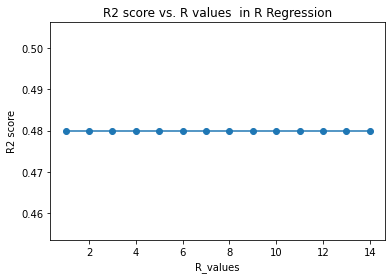

In [41]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error


# Define the range of R values
R_values = np.arange(1, 15)


# Initialize an empty list to store the R2 values
R2_score_values = []

# Loop through each k value
for r in R_values:
    # Define the KNN regression model
    modeloR = RadiusNeighborsRegressor(radius=r)
    
    # Fit the model to the training data
    modeloR.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test data
    y_pred_modeloR_regression = modeloR.predict(X_diabetes_test)
    
    # Calculate the R2_score
    R2_score_modelo_R_regression = r2_score(y_diabetes_test,y_pred_modeloR_regression)
   
    
    # Append the RMSE value to the list
    R2_score_values.append(R2_score_modeloKNN_regression)

# Plot the RMSE values against the k values
plt.plot(R_values, R2_score_values, marker='o')
plt.xlabel('R_values')
plt.ylabel('R2 score')
plt.title('R2 score vs. R values  in R Regression')
plt.show()

##### Evaluación el coeficiente de determinación ajustado [para el caso del modeloKNN_regression y modeloR_regression  para dataset de diabetes]

- R2 ajustada para el caso del modeloKNN_regression para dataset de diabetes

In [38]:
R2_ajustada_modeloKNN_regression_n5 = 1 -(1-R2_score_modeloKNN_regression_n5)*(len(y_diabetes_train)-1)/(len(y_diabetes_train)-len(diabetes['feature_names'])-1)
R2_ajustada_modeloKNN_regression_n5

0.464655283327042

- R2 ajustada para el caso del modeloR_regression para dataset de diabetes

In [27]:
R2_ajustada_modeloR_regression = 1 -(1-R2_score_modeloR_regression)*(len(y_diabetes_train)-1)/(len(y_diabetes_train)-len(diabetes['feature_names'])-1)
R2_ajustada_modeloR_regression

-0.03161948501144196

#### En general se muestra que el valor máximo de R2 alcanzado es de 50% 

##### Evaluación de Errores MAE y MAPE [para el caso del modeloKNN_regression y modeloR_regression  para dataset de diabetes]

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

##### Evaluación de Errores MAE y MAPE [para el caso del modeloKNN_regression y modelo_R_regression para dataset de diabetes]

#####  Errores MAE y MAPE [para el caso del modeloKNN_regression para dataset de diabetes]

MAE [para el caso del modeloKNN_regression_n5 para dataset de diabetes]

In [43]:
MAE_modeloKNN_regression_n5 = mean_absolute_error(y_diabetes_test,y_pred_modeloKNN_regression_n5)
MAE_modeloKNN_regression_n5

52.89213483146068

MAPE [para el caso del modeloKNN_regression_n5 para dataset de diabetes]

In [44]:
MAPE_modeloKNN_regression_n5 = mean_absolute_percentage_error(y_diabetes_test,y_pred_modeloKNN_regression_n5)
MAPE_modeloKNN_regression_n5

0.519964105985823

Evaluación de diferentes valores de MAPE score para diferentes valores de n_neighbors en el caso del modeloKNN_regression para dataset de diabetes

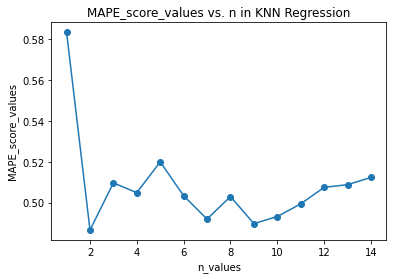

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values
n_neighbors_values = np.arange(1, 15)

# Initialize an empty list to store the R2 values
MAPE_score_values = []

# Loop through each k value
for n in n_neighbors_values:
    # Define the KNN regression model
    modeloK = KNeighborsRegressor(n_neighbors=n)
    
    # Fit the model to the training data
    modeloK.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test data
    y_pred_modeloKNN_regression = modeloK.predict(X_diabetes_test)
    
    # Calculate the  MAPE score

    MAPE_modeloKNN_regression = mean_absolute_percentage_error(y_diabetes_test,y_pred_modeloKNN_regression)

    
    # Append the RMSE value to the list
    MAPE_score_values.append(MAPE_modeloKNN_regression)

# Plot the RMSE values against the k values
plt.plot(n_neighbors_values, MAPE_score_values, marker='o')
plt.xlabel('n_values')
plt.ylabel('MAPE_score_values')
plt.title('MAPE_score_values vs. n in KNN Regression')
plt.show()

#####  Errores MAE y MAPE [para el caso del modelo_R_regression para dataset de diabetes]

MAE [para el caso del modelo_R_regression_R10 para dataset de diabetes]

In [46]:
MAE_modelo_R_regression_R10 = mean_absolute_error(y_diabetes_test,y_pred_modeloR_regression_R10)
MAE_modelo_R_regression_R10

74.38625584874431

MAPE [para el caso del modelo_R_regression_R10 para dataset de diabetes]

In [47]:
MAPE_modelo_R_regression_R10 = mean_absolute_percentage_error(y_diabetes_test,y_pred_modeloR_regression_R10)
MAPE_modelo_R_regression_R10

0.8000483381217898

Evaluación de diferentes valores de MAPE score para diferentes valores de n_neighbors en el caso del modeloKNN_regression para dataset de diabetes

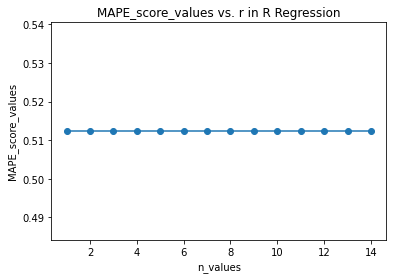

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.metrics import mean_squared_error

# Define the range of k values
n_neighbors_values = np.arange(1, 15)

# Initialize an empty list to store the R2 values
MAPE_score_values = []

# Loop through each k value
for r in R_values:
    # Define the KNN regression model
    modeloR = RadiusNeighborsRegressor(radius=r)
    
    # Fit the model to the training data
    modeloR.fit(X_diabetes_train, y_diabetes_train)
    
    # Make predictions on the test data
    y_pred_modelo_R_regression = modeloK.predict(X_diabetes_test)
    
    # Calculate the  MAPE score

    MAPE_modelo_R_regression = mean_absolute_percentage_error(y_diabetes_test,y_pred_modelo_R_regression)

    
    # Append the RMSE value to the list
    MAPE_score_values.append(MAPE_modelo_R_regression)

# Plot the RMSE values against the k values
plt.plot(n_neighbors_values, MAPE_score_values, marker='o')
plt.xlabel('n_values')
plt.ylabel('MAPE_score_values')
plt.title('MAPE_score_values vs. r in R Regression')
plt.show()

#### En general el  modelo_KNN_Regression para dataset de diabetes tiene un R2 ~40% y MAPE de ~60%

### Para modelo Arbol_Regression  